# Yash Kumar

## Research Questions

1. **Which characteristic(s) most closely relate(s) to determining if a breast lump is cancerous or non-cancerous? How much weight does it carry in determining the diagnosis relative to the other features?**

- I will analyze the correlation between each feature and the cancer diagnosis to understand their relationship better. To do this, I will create correlation heatmaps using Pearson correlation coefficients to visualize the correlations. After examining these correlations, I will select the features that show the highest correlations for further analysis. Finally, I will create detailed scatter plots, box plots, violin plots, and density plots using the 'seaborn' and 'matplotlib' libraries to understand better the relationship between the selected features and the diagnosis. Through this analysis, I will identify the characteristics with the highest correlation with a patient's cancer diagnosis. Furthermore, this analysis can help determine which features may be used as predictive cancer diagnosis markers and assist in making accurate diagnoses.

***

2. **How do the distributions of features vary across different sizes of tumours? More specifically, how does the importance of features vary with the size of the tumour?**

- The dataset can be divided into three groups based on tumour size to explore how the distributions of features vary across different sizes of tumours. Then, visualizations such as histograms, density plots, and box plots can be used to compare the feature distributions across these groups. By examining these visualizations, one can identify whether certain features are more important for predicting malignancy or benignity in tumours of a particular size and whether the relationship between features and diagnosis varies across tumour sizes.

***

3. **How well can one predict whether a breast mass is cancerous or non-cancerous using the K-Nearest Neighbours or Support Vector Classifier models? (I am currently only familiar with KNN and SVC.)**

- I have finished working on the third question and built a web application using Streamlit.

- What have I done? 
    - To prepare the data, I employed 'LabelEncoder()' to transform the categorical data into numerical data and pipelines to streamline the ML process. In addition, 'StandardScalar()' was utilized to ensure all features were on the same scale. Subsequently, I employed SVC and KNN models to predict whether a patient was cancerous and 'accuracy_score()' to measure the model's accuracy. Finally, to obtain a more precise representation of the accuracy, I implemented 'cross_val_score().' Eventually, I settled on the Support Vector Classifier model, optimizing it with 'GridSearchCV(),' discovering the ideal parameters, and achieving a 'cross_val_score' of 97.9%.

**Web App Link: [Streamlit App](https://kyash03-breastcancerwebapp-main-ckdp68.streamlit.app)**

I have the code for the development of the ML model and the app itself in a folder called 'WebAppCode.'

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
sns.set_style("darkgrid")

In [69]:
df = pd.read_csv('../data/raw/data.csv')

In [70]:
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

**The above output indicates that the values will need to be scaled. Scaling them will make it easier to compare variables and improve visualization.**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**The above cell's result shows that none of the columns have a missing value.**

In [72]:
df.shape

(569, 33)

In [73]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**We do not need the 'id' and 'Unnamed: 32' columns.**

In [74]:
df.drop(['id', 'Unnamed: 32'], axis=1).describe(
    include=np.number).apply(lambda x: x.apply(lambda y: format(y, 'f')))

radius_mean texture_mean perimeter_mean    area_mean smoothness_mean  \
count  569.000000   569.000000     569.000000   569.000000      569.000000   
mean    14.127292    19.289649      91.969033   654.889104        0.096360   
std      3.524049     4.301036      24.298981   351.914129        0.014064   
min      6.981000     9.710000      43.790000   143.500000        0.052630   
25%     11.700000    16.170000      75.170000   420.300000        0.086370   
50%     13.370000    18.840000      86.240000   551.100000        0.095870   
75%     15.780000    21.800000     104.100000   782.700000        0.105300   
max     28.110000    39.280000     188.500000  2501.000000        0.163400   

      compactness_mean concavity_mean concave points_mean symmetry_mean  \
count       569.000000     569.000000          569.000000    569.000000   
mean          0.104341       0.088799            0.048919      0.181162   
std           0.052813       0.079720            0.038803      0.027414   
min           0.019380       0.000000            0.000000      0.106000   
25%           0.064920       0.029560            0.020310      0.161900   
50%           0.092630       0.061540            0.033500      0.179200   
75%           0.130400       0.130700            0.074000      0.195700   
max           0.345400       0.426800            0.201200      0.304000   

      fractal_dimension_mean  ... radius_worst texture_worst perimeter_worst  \
count             569.000000  ...   569.000000    569.000000      569.000000   
mean                0.062798  ...    16.269190     25.677223      107.261213   
std                 0.007060  ...     4.833242      6.146258       33.602542   
min                 0.049960  ...     7.930000     12.020000       50.410000   
25%                 0.057700  ...    13.010000     21.080000       84.110000   
50%                 0.061540  ...    14.970000     25.410000       97.660000   
75%                 0.066120  ...    18.790000     29.720000      125.400000   
max                 0.097440  ...    36.040000     49.540000      251.200000   

        area_worst smoothness_worst compactness_worst concavity_worst  \
count   569.000000       569.000000        569.000000      569.000000   
mean    880.583128         0.132369          0.254265        0.272188   
std     569.356993         0.022832          0.157336        0.208624   
min     185.200000         0.071170          0.027290        0.000000   
25%     515.300000         0.116600          0.147200        0.114500   
50%     686.500000         0.131300          0.211900        0.226700   
75%    1084.000000         0.146000          0.339100        0.382900   
max    4254.000000         0.222600          1.058000        1.252000   

      concave points_worst symmetry_worst fractal_dimension_worst  
count           569.000000     569.000000              569.000000  
mean              0.114606       0.290076                0.083946  
std               0.065732       0.061867                0.018061  
min               0.000000       0.156500                0.055040  
25%               0.064930       0.250400                0.071460  
50%               0.099930       0.282200                0.080040  
75%               0.161400       0.317900                0.092080  
max               0.291000       0.663800                0.207500  

[8 rows x 30 columns]

**The above code removes the 'id' and 'Unnamed: 32' columns from the data frame and then applies the format() function to the output of the 'describe' method to display the results as floats.**

In [75]:
df.drop(['id', 'Unnamed: 32'], axis=1).describe(exclude=np.number)

diagnosis
count        569
unique         2
top            B
freq         357

**The following cell cleans the data, i.e., drops the unnecessary columns.**

In [76]:
df_cleaned = df.copy().drop(['id', 'Unnamed: 32'], axis=1)

**The above code creates a copy of the original frame to maintain an unmodified version of the dataset and then drops the unnecessary columns.**

In [77]:
df_cleaned

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [78]:
df_output = pd.DataFrame()

for column_name in df_cleaned.columns[1:]:
    user_df = df_cleaned.groupby(
        by='diagnosis').describe().round(2).loc[:, column_name]
    user_df['feature_name'] = [column_name] * 2
    df_output = pd.concat([df_output, user_df])

In [79]:
df_output.iloc[:, 1:][[
    'feature_name', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
]]

feature_name     mean     std     min     25%      50%  \
diagnosis                                                                      
B                      radius_mean    12.15    1.78    6.98   11.08    12.20   
M                      radius_mean    17.46    3.20   10.95   15.08    17.33   
B                     texture_mean    17.91    4.00    9.71   15.15    17.39   
M                     texture_mean    21.60    3.78   10.38   19.33    21.46   
B                   perimeter_mean    78.08   11.81   43.79   70.87    78.18   
M                   perimeter_mean   115.37   21.85   71.90   98.74   114.20   
B                        area_mean   462.79  134.29  143.50  378.20   458.40   
M                        area_mean   978.38  367.94  361.60  705.30   932.00   
B                  smoothness_mean     0.09    0.01    0.05    0.08     0.09   
M                  smoothness_mean     0.10    0.01    0.07    0.09     0.10   
B                 compactness_mean     0.08    0.03    0.02    0.06     0.08   
M                 compactness_mean     0.15    0.05    0.05    0.11     0.13   
B                   concavity_mean     0.05    0.04    0.00    0.02     0.04   
M                   concavity_mean     0.16    0.08    0.02    0.11     0.15   
B              concave points_mean     0.03    0.02    0.00    0.02     0.02   
M              concave points_mean     0.09    0.03    0.02    0.06     0.09   
B                    symmetry_mean     0.17    0.02    0.11    0.16     0.17   
M                    symmetry_mean     0.19    0.03    0.13    0.17     0.19   
B           fractal_dimension_mean     0.06    0.01    0.05    0.06     0.06   
M           fractal_dimension_mean     0.06    0.01    0.05    0.06     0.06   
B                        radius_se     0.28    0.11    0.11    0.21     0.26   
M                        radius_se     0.61    0.35    0.19    0.39     0.55   
B                       texture_se     1.22    0.59    0.36    0.80     1.11   
M                       texture_se     1.21    0.48    0.36    0.89     1.10   
B                     perimeter_se     2.00    0.77    0.76    1.44     1.85   
M                     perimeter_se     4.32    2.57    1.33    2.72     3.68   
B                          area_se    21.14    8.84    6.80   15.26    19.63   
M                          area_se    72.67   61.36   13.99   35.76    58.46   
B                    smoothness_se     0.01    0.00    0.00    0.01     0.01   
M                    smoothness_se     0.01    0.00    0.00    0.01     0.01   
B                   compactness_se     0.02    0.02    0.00    0.01     0.02   
M                   compactness_se     0.03    0.02    0.01    0.02     0.03   
B                     concavity_se     0.03    0.03    0.00    0.01     0.02   
M                     concavity_se     0.04    0.02    0.01    0.03     0.04   
B                concave points_se     0.01    0.01    0.00    0.01     0.01   
M                concave points_se     0.02    0.01    0.01    0.01     0.01   
B                      symmetry_se     0.02    0.01    0.01    0.02     0.02   
M                      symmetry_se     0.02    0.01    0.01    0.01     0.02   
B             fractal_dimension_se     0.00    0.00    0.00    0.00     0.00   
M             fractal_dimension_se     0.00    0.00    0.00    0.00     0.00   
B                     radius_worst    13.38    1.98    7.93   12.08    13.35   
M                     radius_worst    21.13    4.28   12.84   17.73    20.59   
B                    texture_worst    23.52    5.49   12.02   19.58    22.82   
M                    texture_worst    29.32    5.43   16.67   25.78    28.94   
B                  perimeter_worst    87.01   13.53   50.41   78.27    86.92   
M                  perimeter_worst   141.37   29.46   85.10  119.32   138.00   
B                       area_worst   558.90  163.60  185.20  447.10   547.40   
M                       area_worst  1422.29  597.97  508.10  970.30  1303.00   
B                 smoo

**The above output displays the statistics for each feature after being grouped by 'diagnosis.'**

In [80]:
df_cleaned['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

[Text(0, 0, '212'), Text(0, 0, '357')]

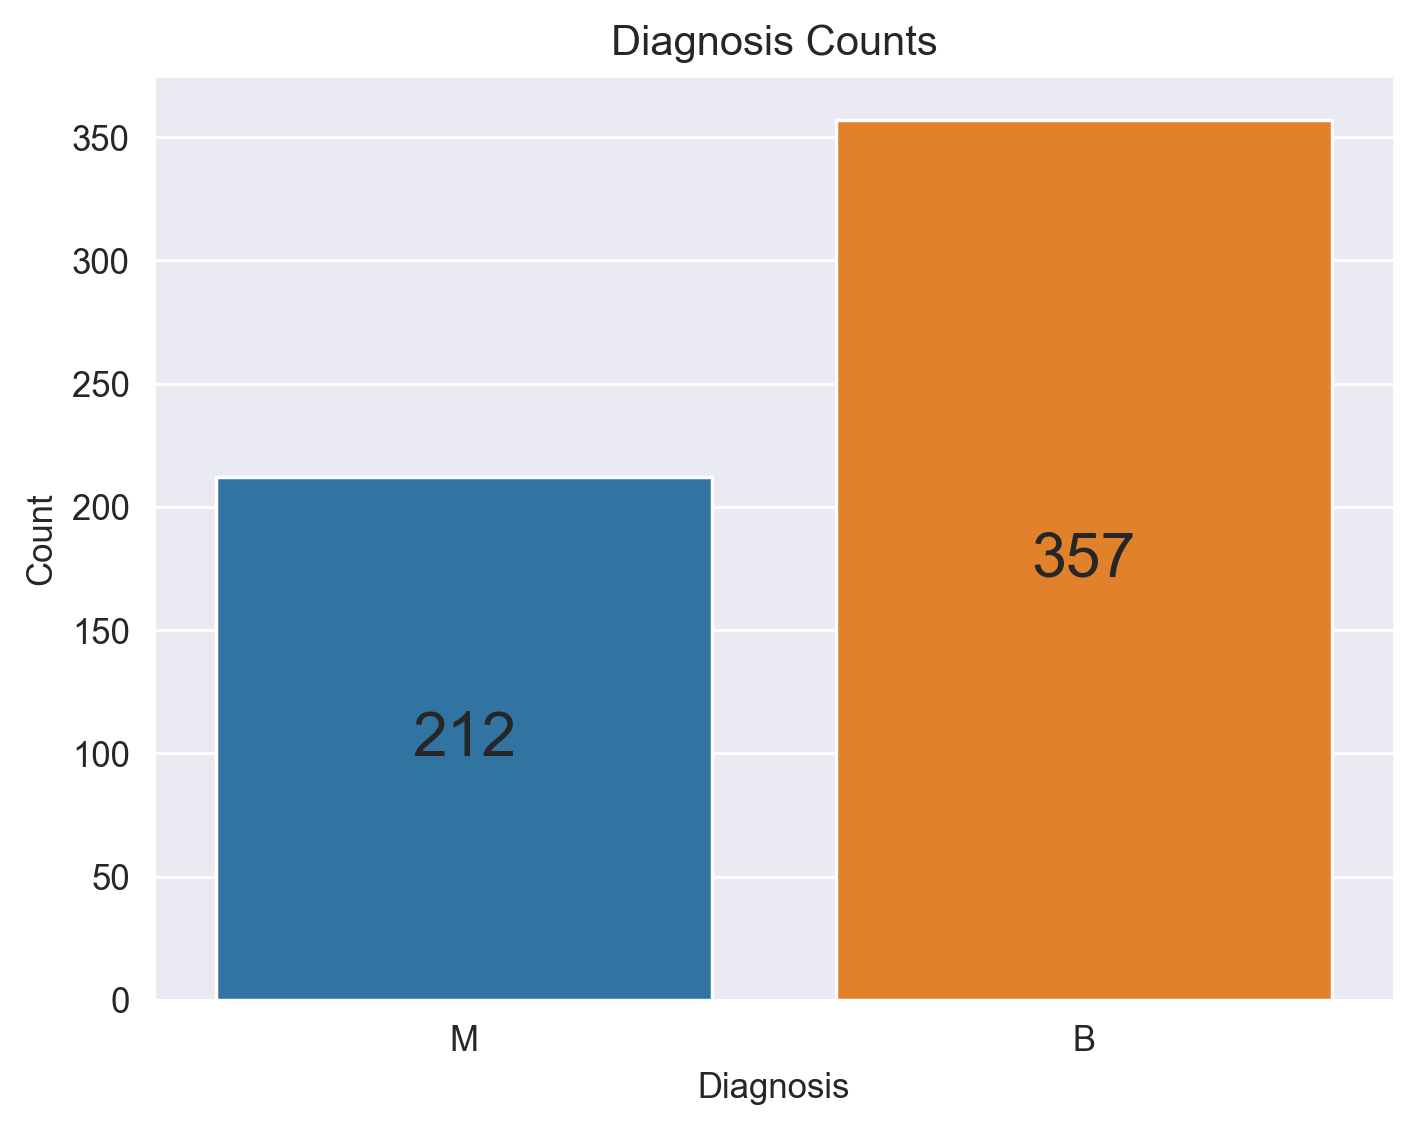

In [81]:
plt.figure(dpi=250)
fig_1 = sns.countplot(data=df_cleaned, x='diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Counts')
fig_1.bar_label(fig_1.containers[0], label_type='center', size=18)

**The above graph tells us that the dataset contains a much larger number of benign samples.**

In [82]:
df_cleaned.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [83]:
corr = df_cleaned.corr(numeric_only=True)

Text(0.5, 1.0, 'Heatmap of Correlations between Columns')

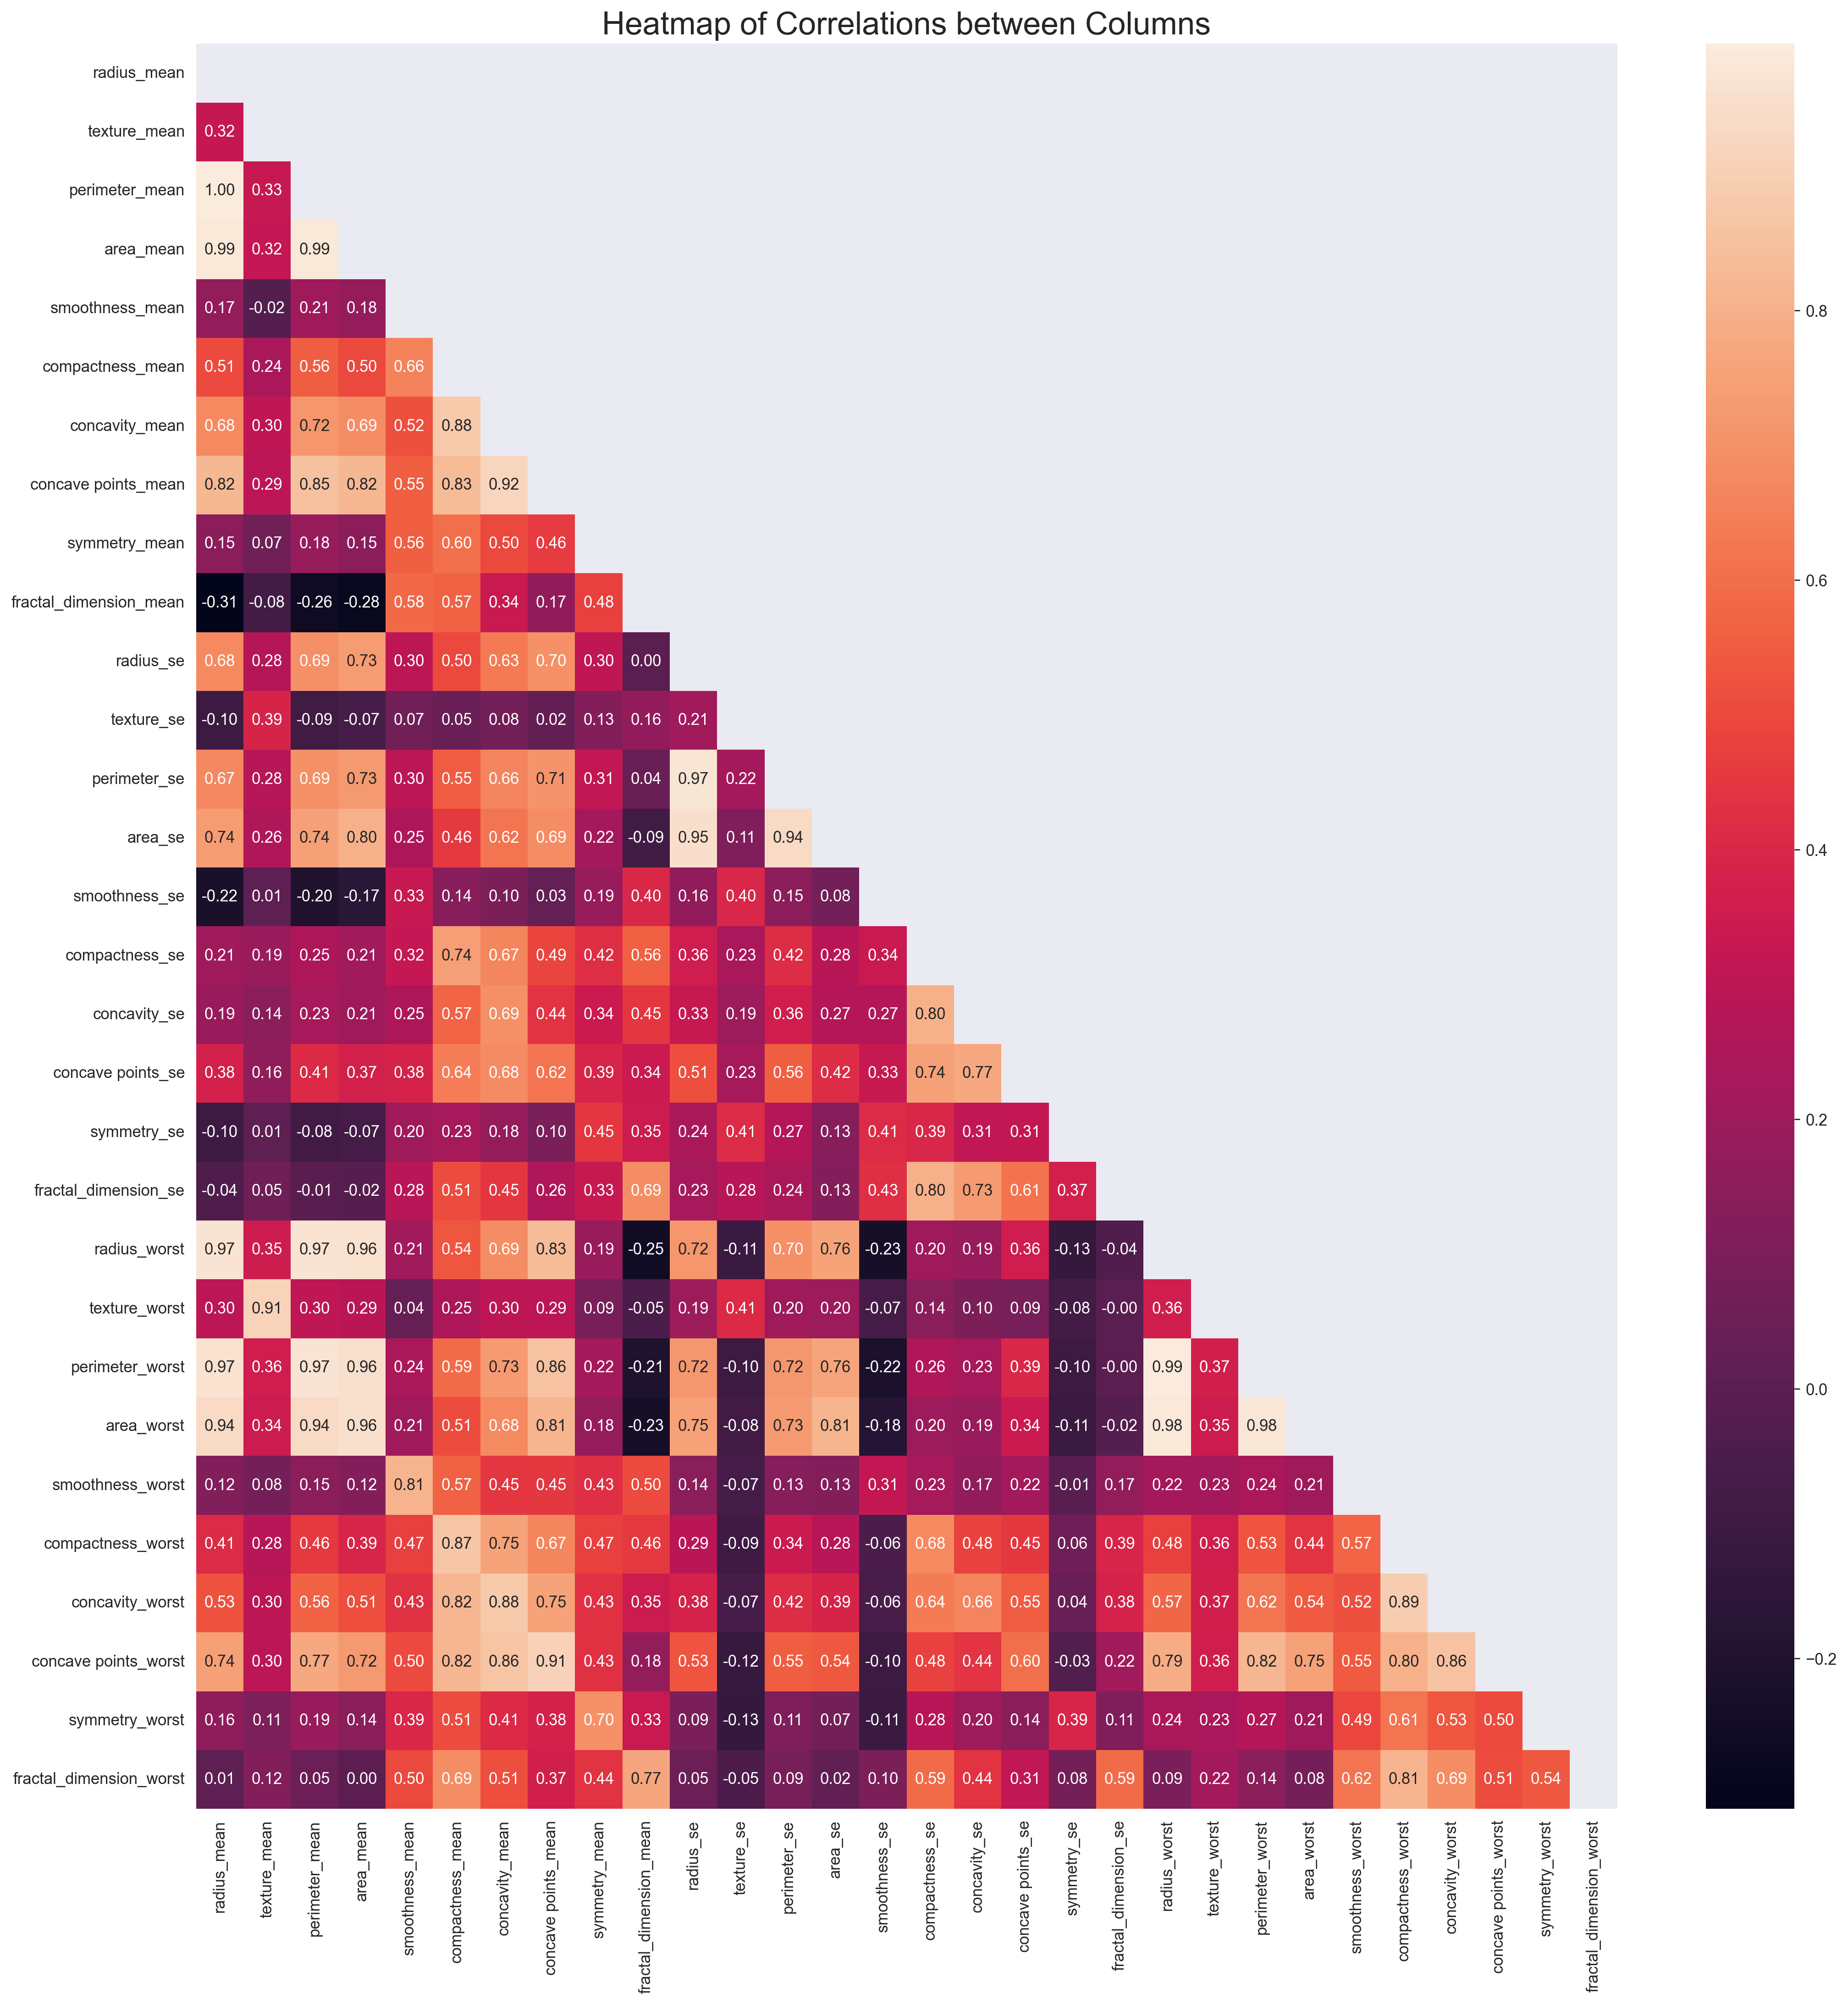

In [84]:
plt.figure(dpi=250, figsize=(20, 20))
fig_2 = sns.heatmap(corr,
                    annot=True,
                    mask=np.triu(np.ones_like(corr)),
                    fmt=".2f")
plt.title('Heatmap of Correlations between Columns', size=20)

Text(0.5, 1.0, 'Heatmap of Correlations between Columns')

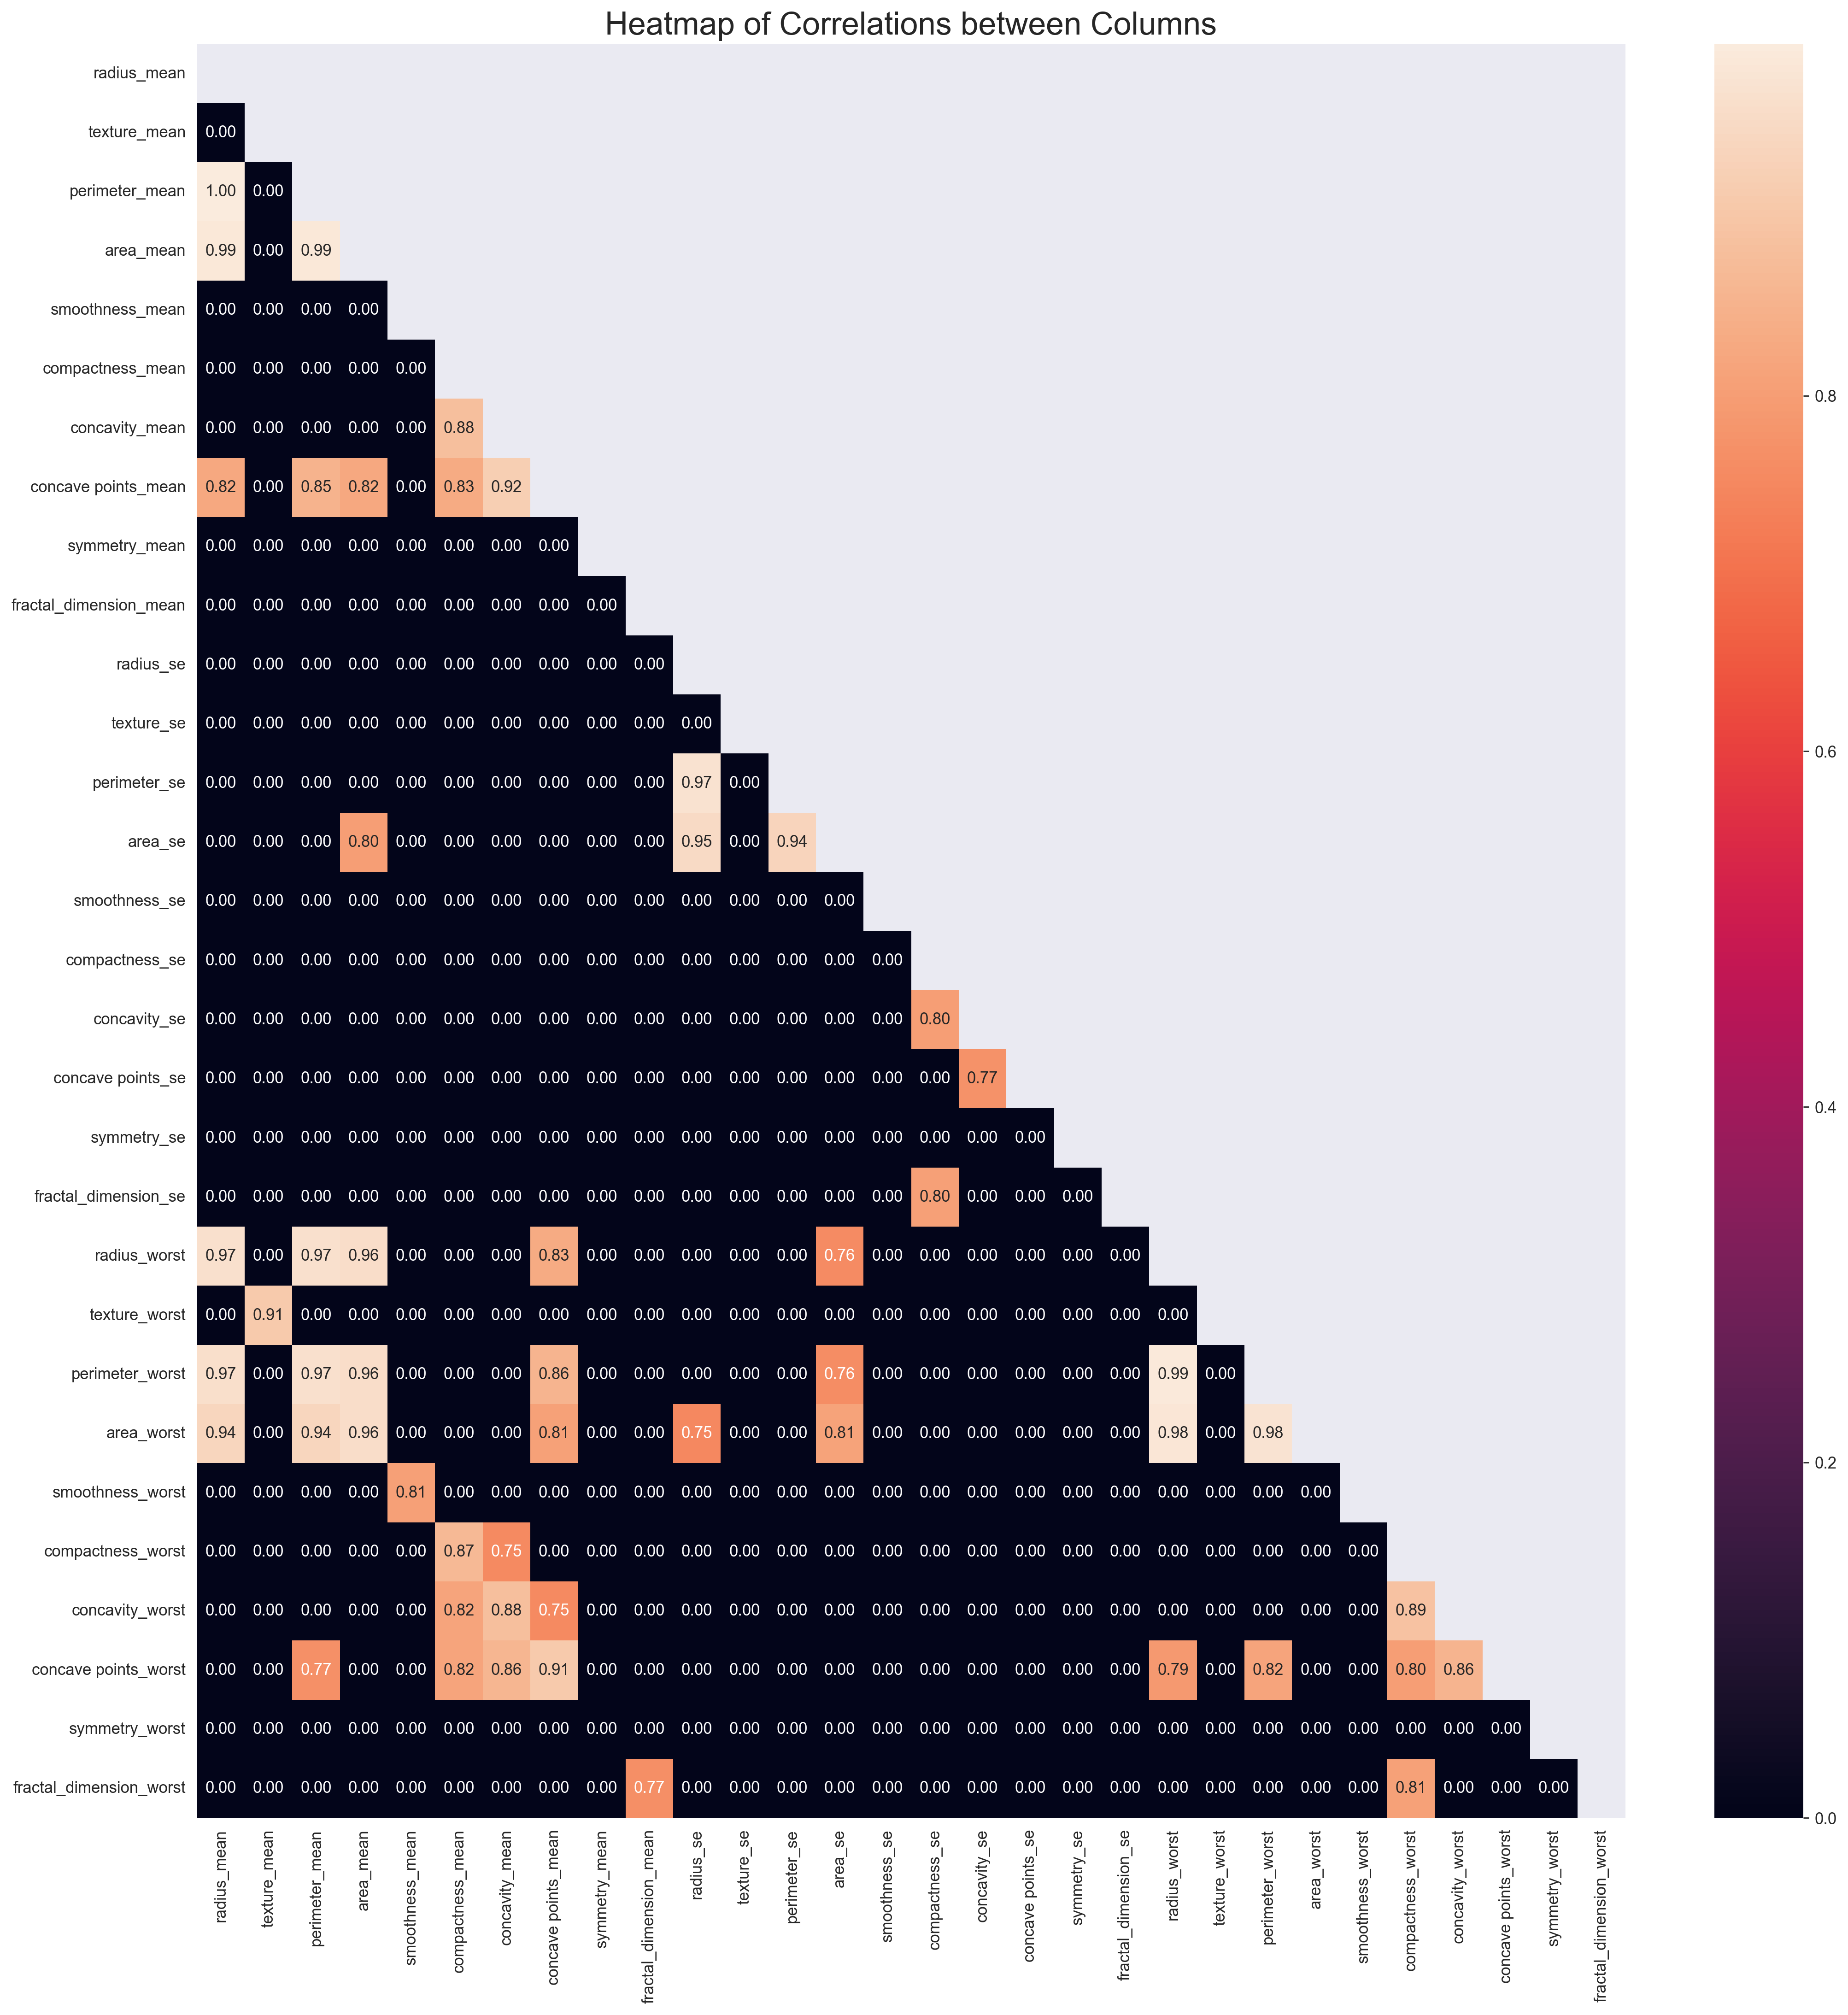

In [85]:
plt.figure(dpi=250, figsize=(20, 20))

corr[abs(corr < 0.75)] = 0
fig_2 = sns.heatmap(corr,
                    annot=True,
                    mask=np.triu(np.ones_like(corr)),
                    fmt=".2f")

plt.title('Heatmap of Correlations between Columns', size=20)

**The heatmap indicates that multiple variables have a high correlation, i.e., a correlation value greater than or equal to 0.75. Other than the apparent high correlation between the 'perimeter' and 'area' variables, what stands out is the strong relationship between the 'compactness,' 'concavity,' and 'concave points' variables.**

**I will explore this relationship using regression plots later on.**

In [86]:
# [x for x in df_cleaned.columns if '_mean' in x]

**The histograms below indicate that most of the variables are right-skewed. The only variable that closely resembles a normal distribution is 'symmetry_mean.'**

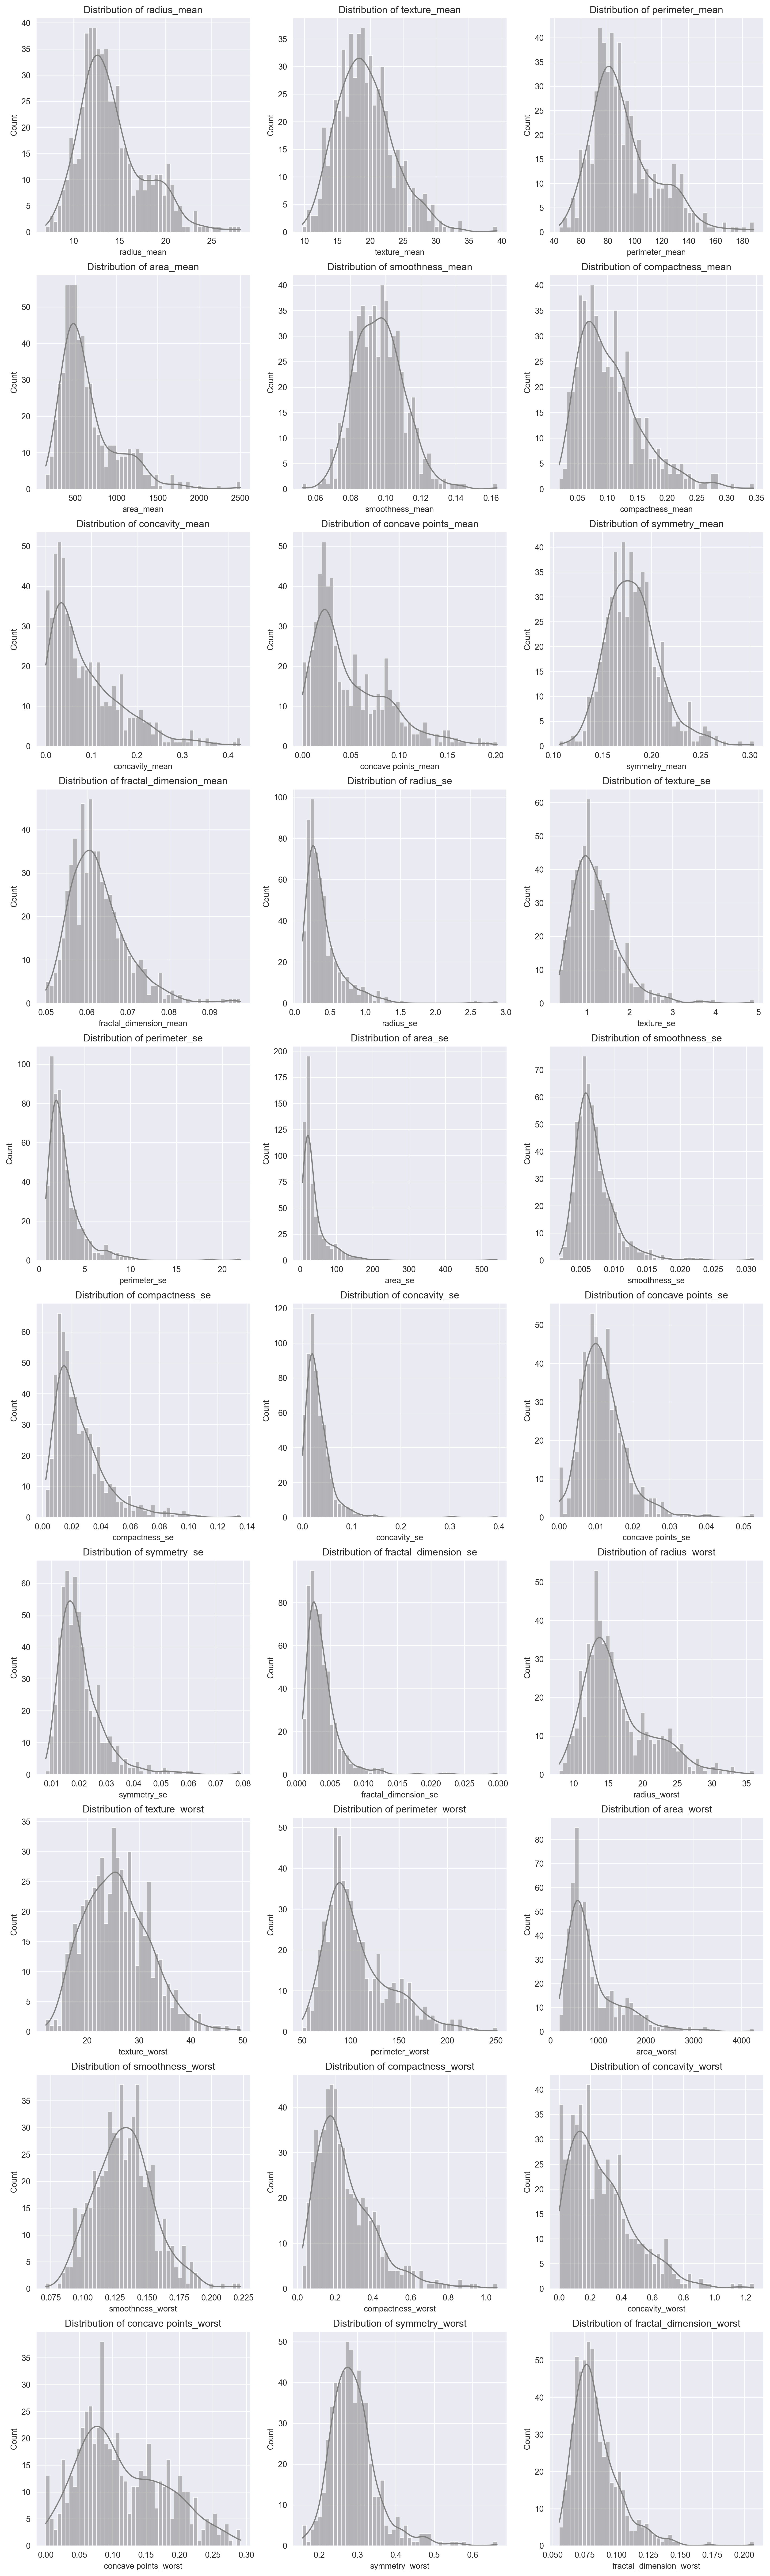

In [104]:
plt.figure(dpi=250, figsize=(16, 56))
for i, column_name in enumerate(df_cleaned.columns[1:]):
    fig = plt.subplot(10, 3, i + 1)
    fig.set_title('Distribution of ' + column_name)
    sns.histplot(data=df_cleaned[column_name], bins=50, color='grey', kde=True)

**I will standardize the data to get accurate values and visually informative graphs.**

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
standard_scaler = StandardScaler()

In [90]:
standard_scaler.fit(df_cleaned.iloc[:, 1:])

StandardScaler()

In [91]:
standardized_data = pd.DataFrame(standard_scaler.transform(
    df_cleaned.iloc[:, 1:]),
                                 columns=df_cleaned.columns[1:])

In [92]:
standardized_data

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  2.255747  ...      1.886690      -1.359293   
1                 -0.868652  ...      1.805927      -0.369203   
2                 -0.398008  ...      1.511870      -0.023974   
3                  4.910919  ...     -0.281464       0.133984   
4                 -0.562450  ...      1.298575      -1.466770   
..                      ...  ...           ...            ...   
564               -0.931027  ...      1.901185       0.117700   
565               -1.058611  ...      1.536720       2.047399   
566               -0.895587  ...      0.561361       1.374854   
567                1.043695  ...      1.961239       2.237926   
568               -0.561032  ...     -1.410893       0.764190   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           2.303601    2.001237          1.307686           2.616665   
1           1.535126    1.890489         -0.375612          -0.430444   
2           1.347475    1.456285          0.527407           1.082932   
3          -0.249939   -0.550021          3.394275           3.893397   
4           1.338539    1.220724          0.220556          -0.313395   
..               ...         ...               ...                ...   
564         1.752563    2.015301          0.378365          -0.273318   
565         1.421940    1.494959         -0.691230          -0.394820   
566         0.579001    0.427906         -0.809587           0.350735   
567         2.303601    1.653171          1.430427           3.904848   
568        -1.432735   -1.075813         -1.859019          -1.207552   

     concavity_worst  concave points_worst  symmetry_worst  \
0           2.109526              2.296076        2.750622   
1          -0.146749              1.087084       -0.243890   
2           0.854974              1.955000        1.152255   
3           1.989588              2.175786        6.046041   
4           0.613179              0.729259       -0.868353   
..               ...                   ...             ...   
564         0.664512              1.629151       -1

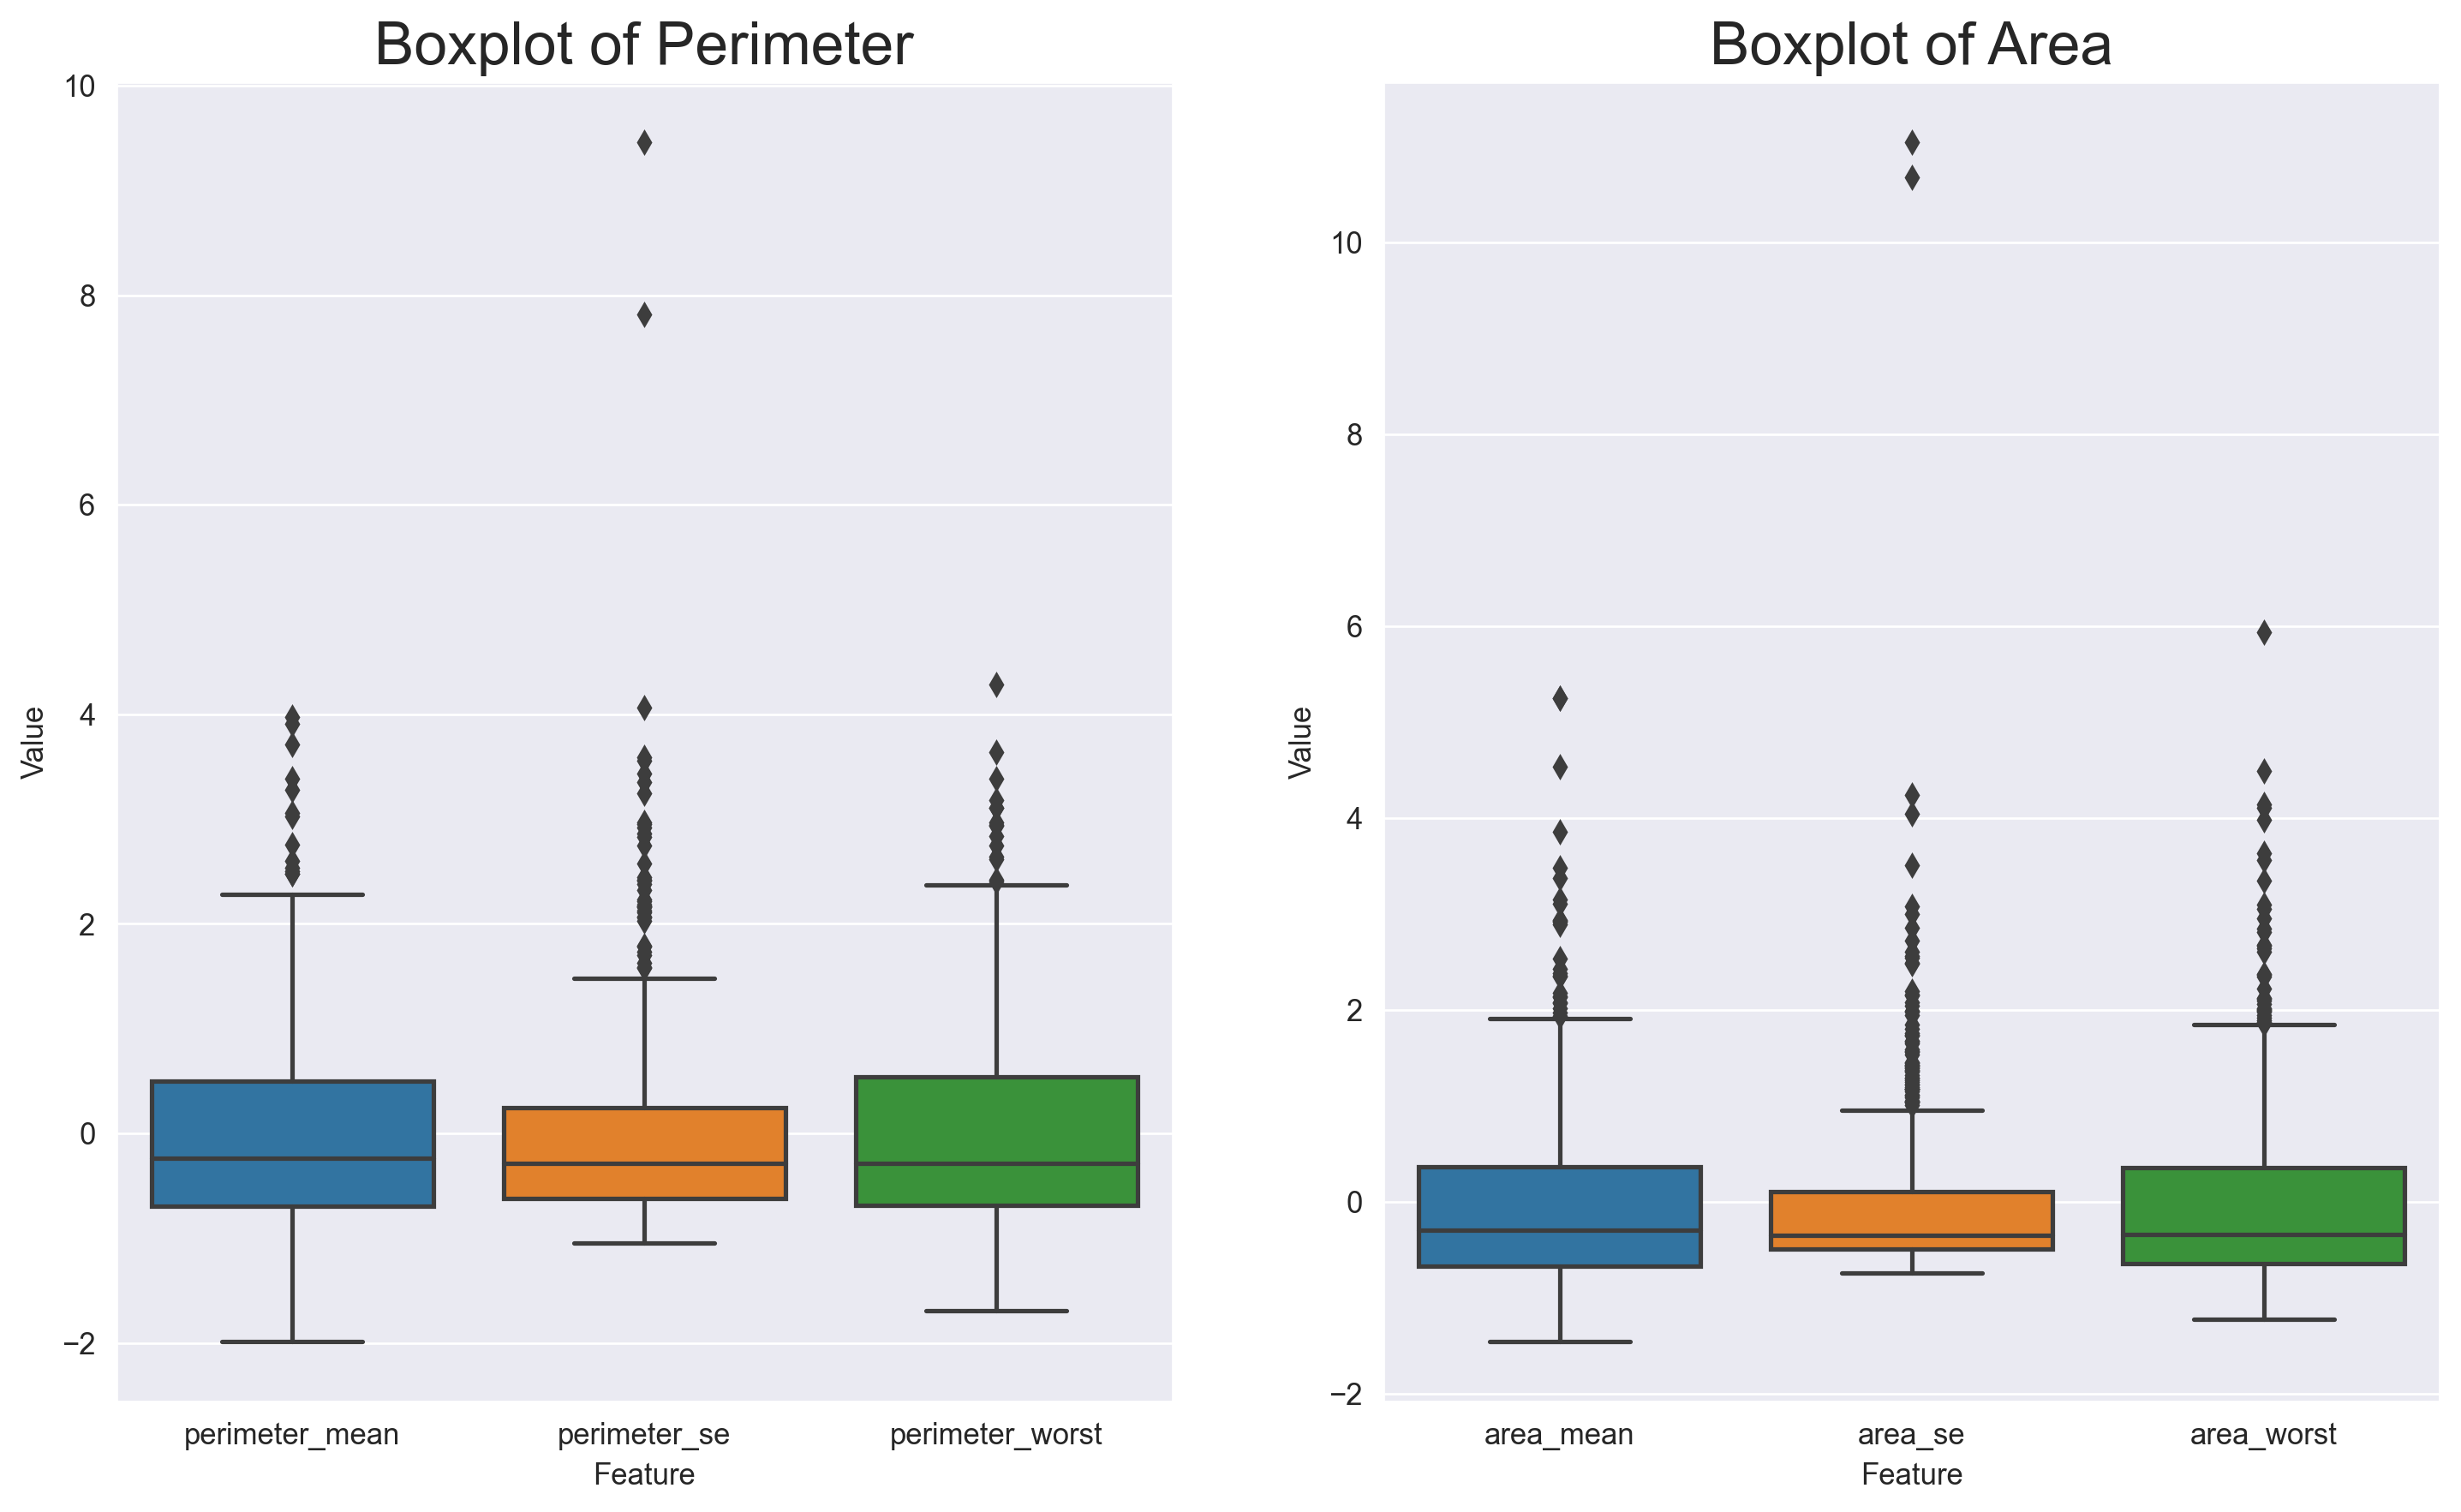

In [93]:
plt.figure(dpi=250, figsize=(14, 8))
feature_names = ['perimeter', 'area']
for i, feature_name in enumerate(feature_names):
    plt.subplot(1, 2, i + 1)
    plt.title('Boxplot of ' + str.capitalize(feature_name[0]) +
              feature_name[1:],
              size=20)
    plt.xlabel('Feature')
    plt.ylabel('Value')
    sns.boxplot(data=standardized_data[
        [x for x in standardized_data.columns if feature_name in x]])

**Observations:**

1. **The box plots indicate that the 'mean' values are more spread out than their counterparts, i.e., 'se' and 'worst. 'mean' values seem to have a large variation.**
2. **The 'perimeter' and 'area' values are quite spread out, indicating that they're both most likely not centred around a particular value; instead, they take on a large range of values.**

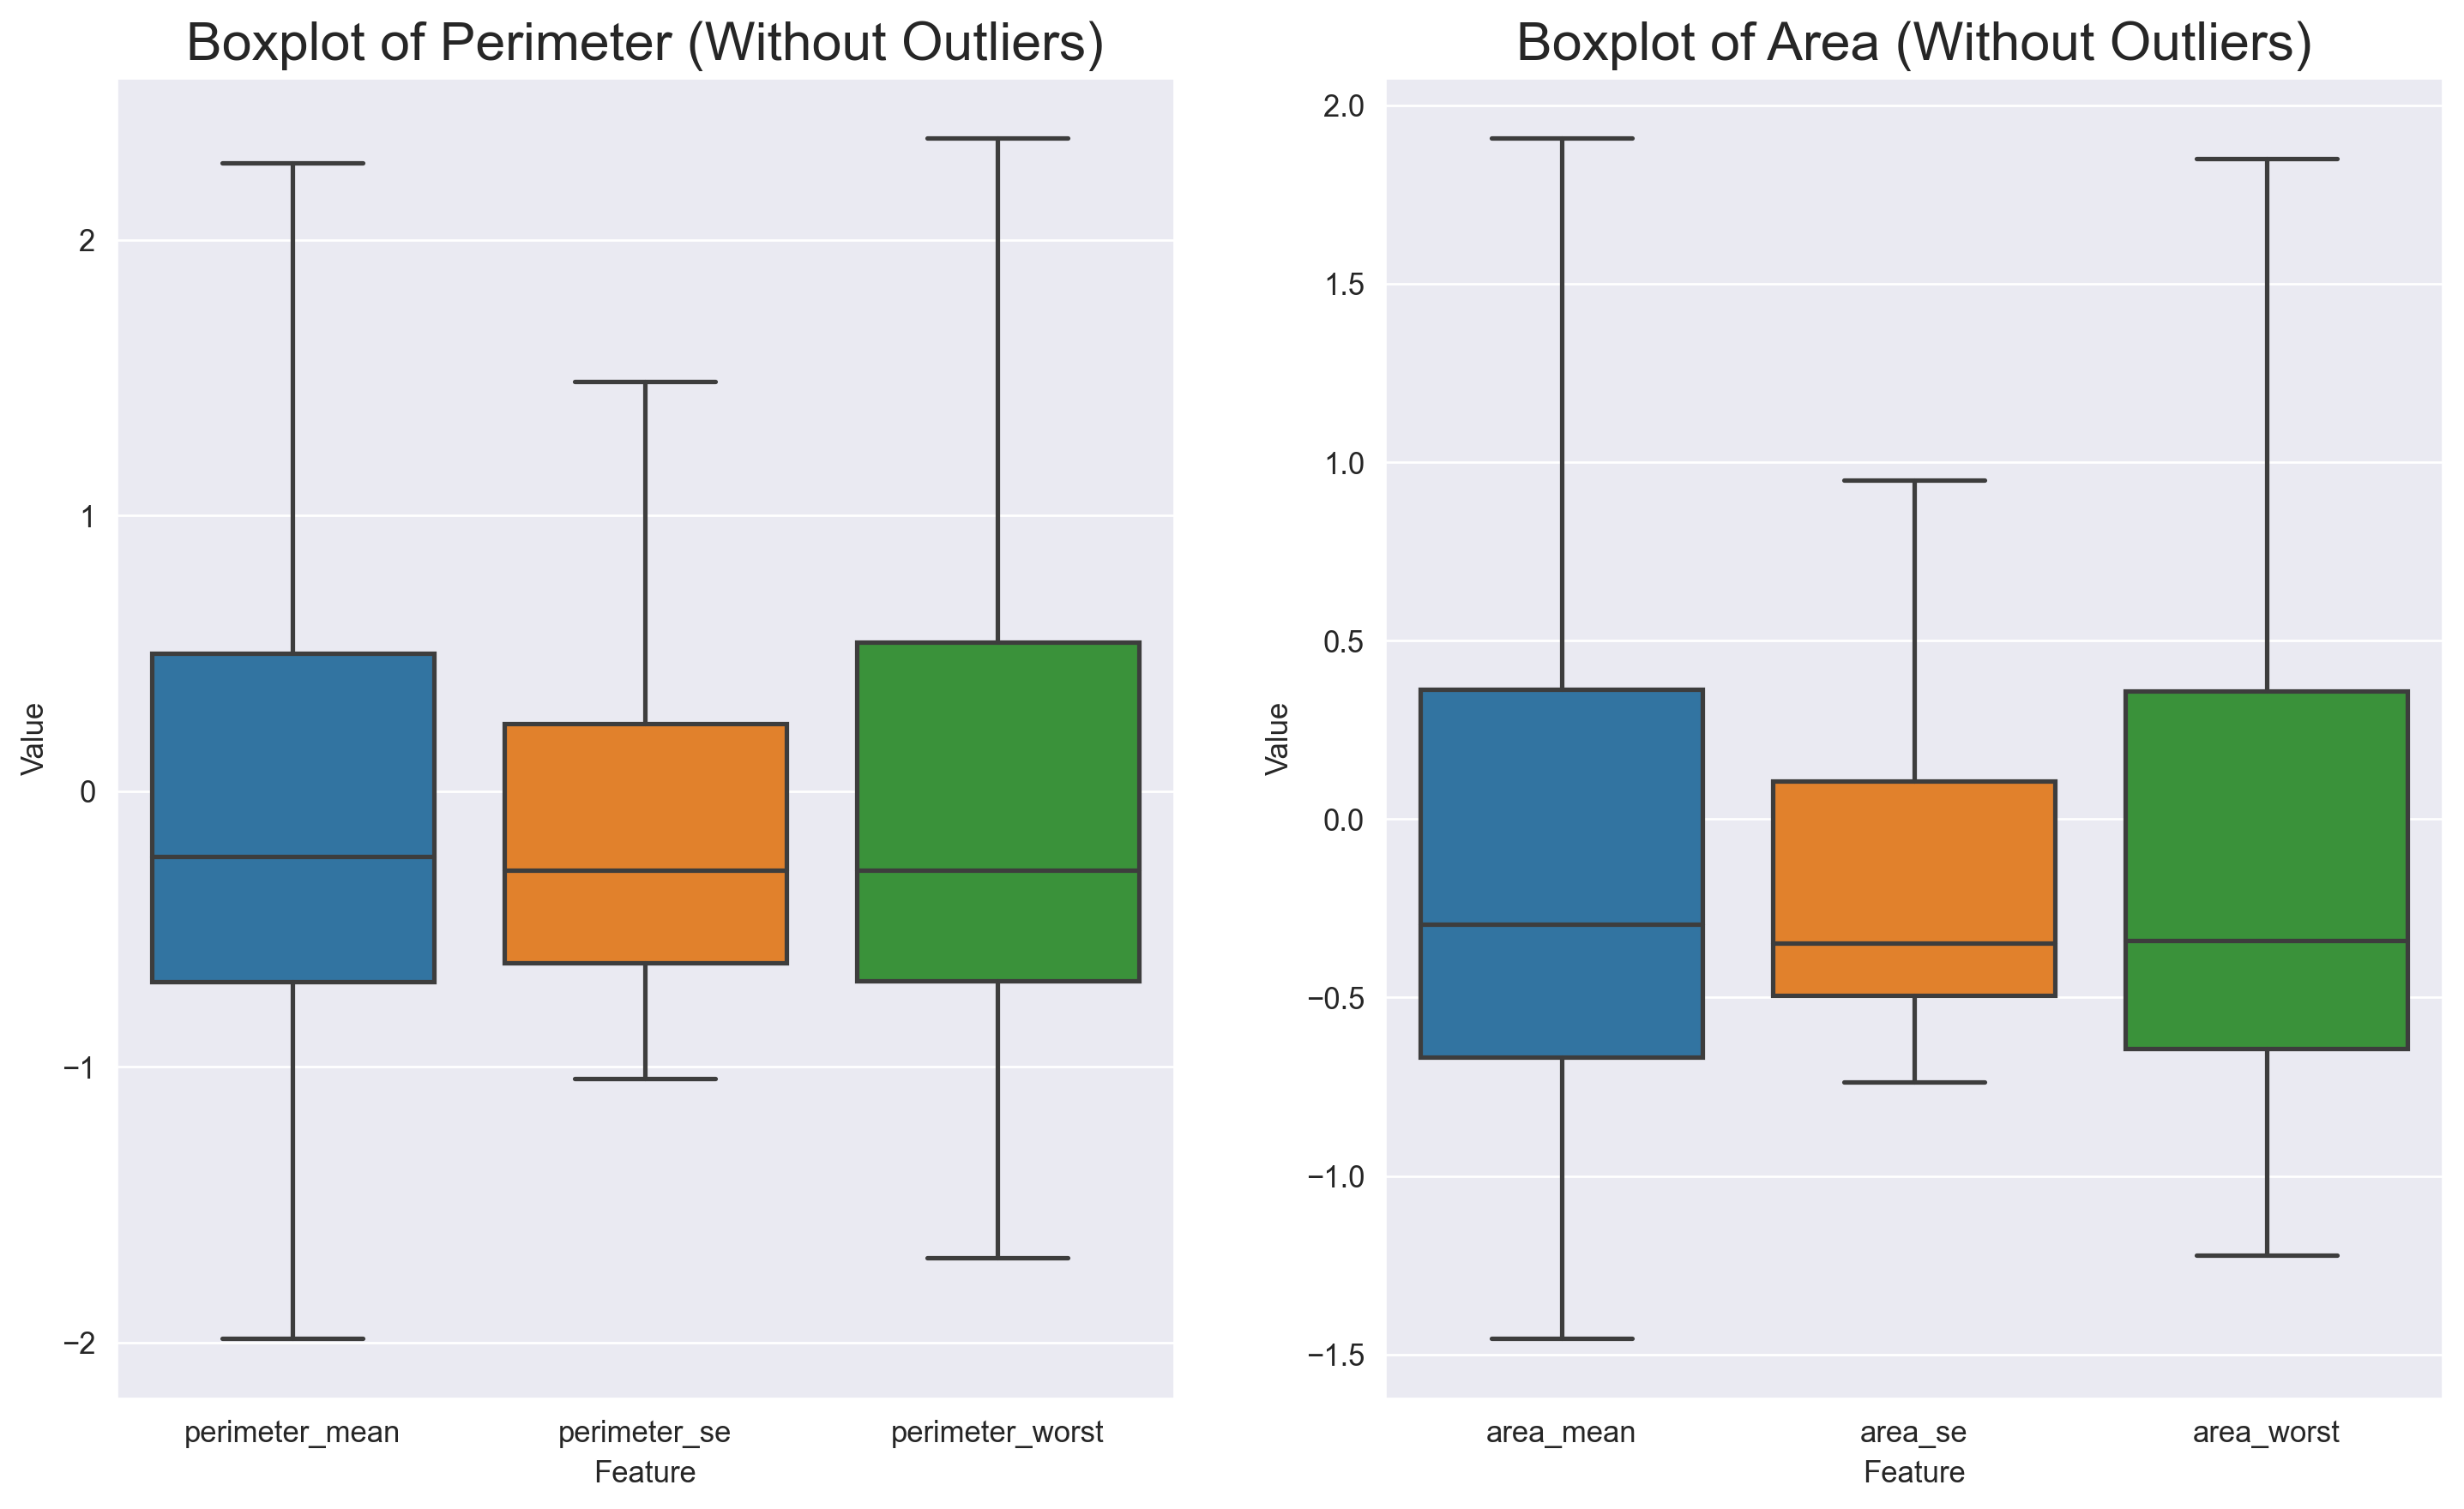

In [94]:
plt.figure(dpi=250, figsize=(14, 8))
feature_names = ['perimeter', 'area']
for i, feature_name in enumerate(feature_names):
    plt.subplot(1, 2, i + 1)
    plt.title('Boxplot of ' + str.capitalize(feature_name[0]) +
              feature_name[1:] + ' (Without Outliers)',
              size=18)
    plt.xlabel('Feature')
    plt.ylabel('Value')
    sns.boxplot(data=standardized_data[[
        x for x in standardized_data.columns if feature_name in x
    ]],
                showfliers=False)

**By setting 'showfliers' to 'False,' outliers from the box plot have been removed, resulting in a more focused and accurate graph that avoids any potential misleading interpretations.**

Text(0.5, 1.0, 'Violin Plots of Mean Values')

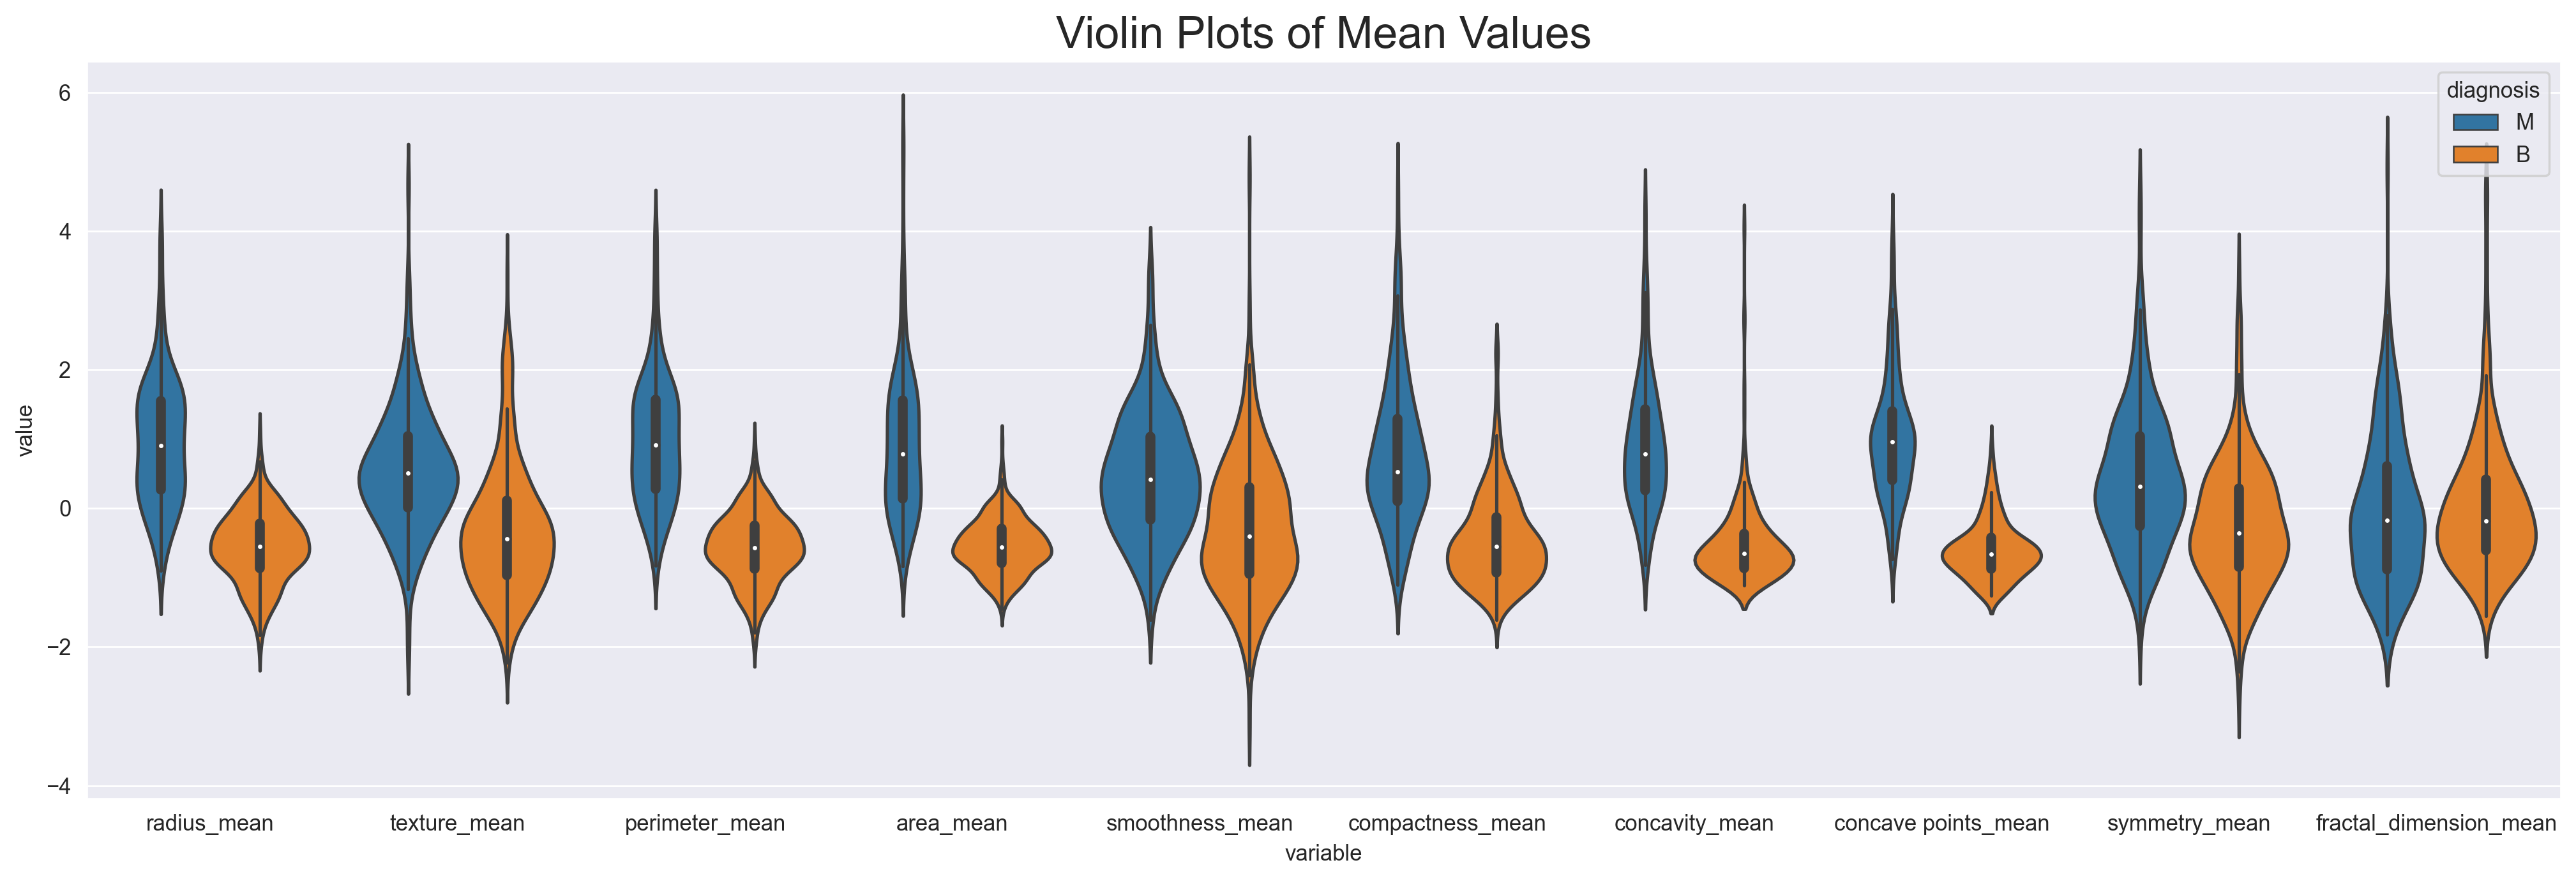

In [96]:
plt.figure(dpi=250, figsize=(20, 6))
fig_3 = sns.violinplot(data=standardized_data.iloc[:, :10].assign(
    diagnosis=df_cleaned['diagnosis']).melt(id_vars='diagnosis'),
                       x='variable',
                       y='value',
                       hue='diagnosis')
plt.title('Violin Plots of Mean Values', size=20)

Text(0.5, 1.0, 'Violin Plots of Standard Error Values')

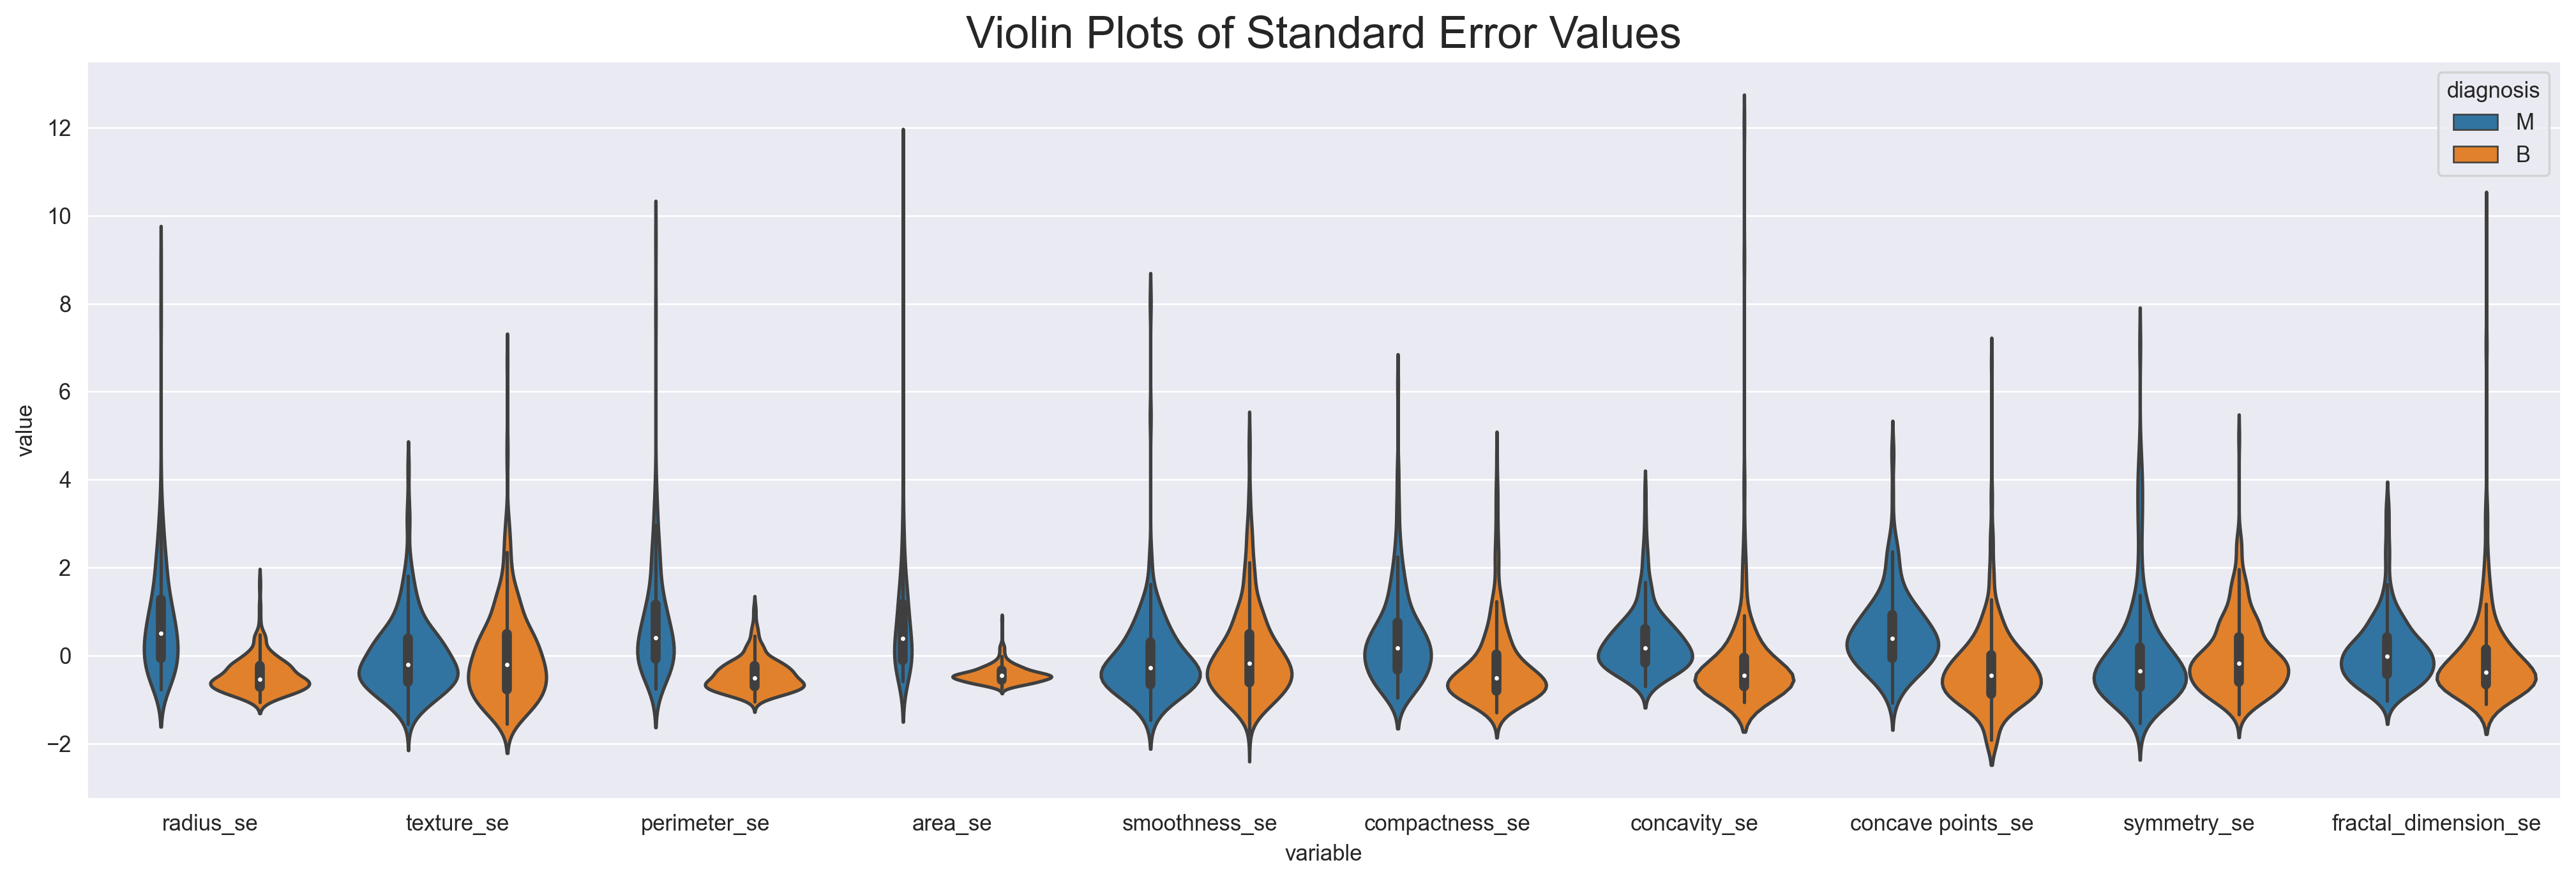

In [99]:
plt.figure(dpi=250, figsize=(20, 6))
fig_4 = sns.violinplot(data=standardized_data.iloc[:, 10:20].assign(
    diagnosis=df_cleaned['diagnosis']).melt(id_vars='diagnosis'),
                       x='variable',
                       y='value',
                       hue='diagnosis')
plt.title('Violin Plots of Standard Error Values', size=20)

Text(0.5, 1.0, 'Violin Plots of Worst Values')

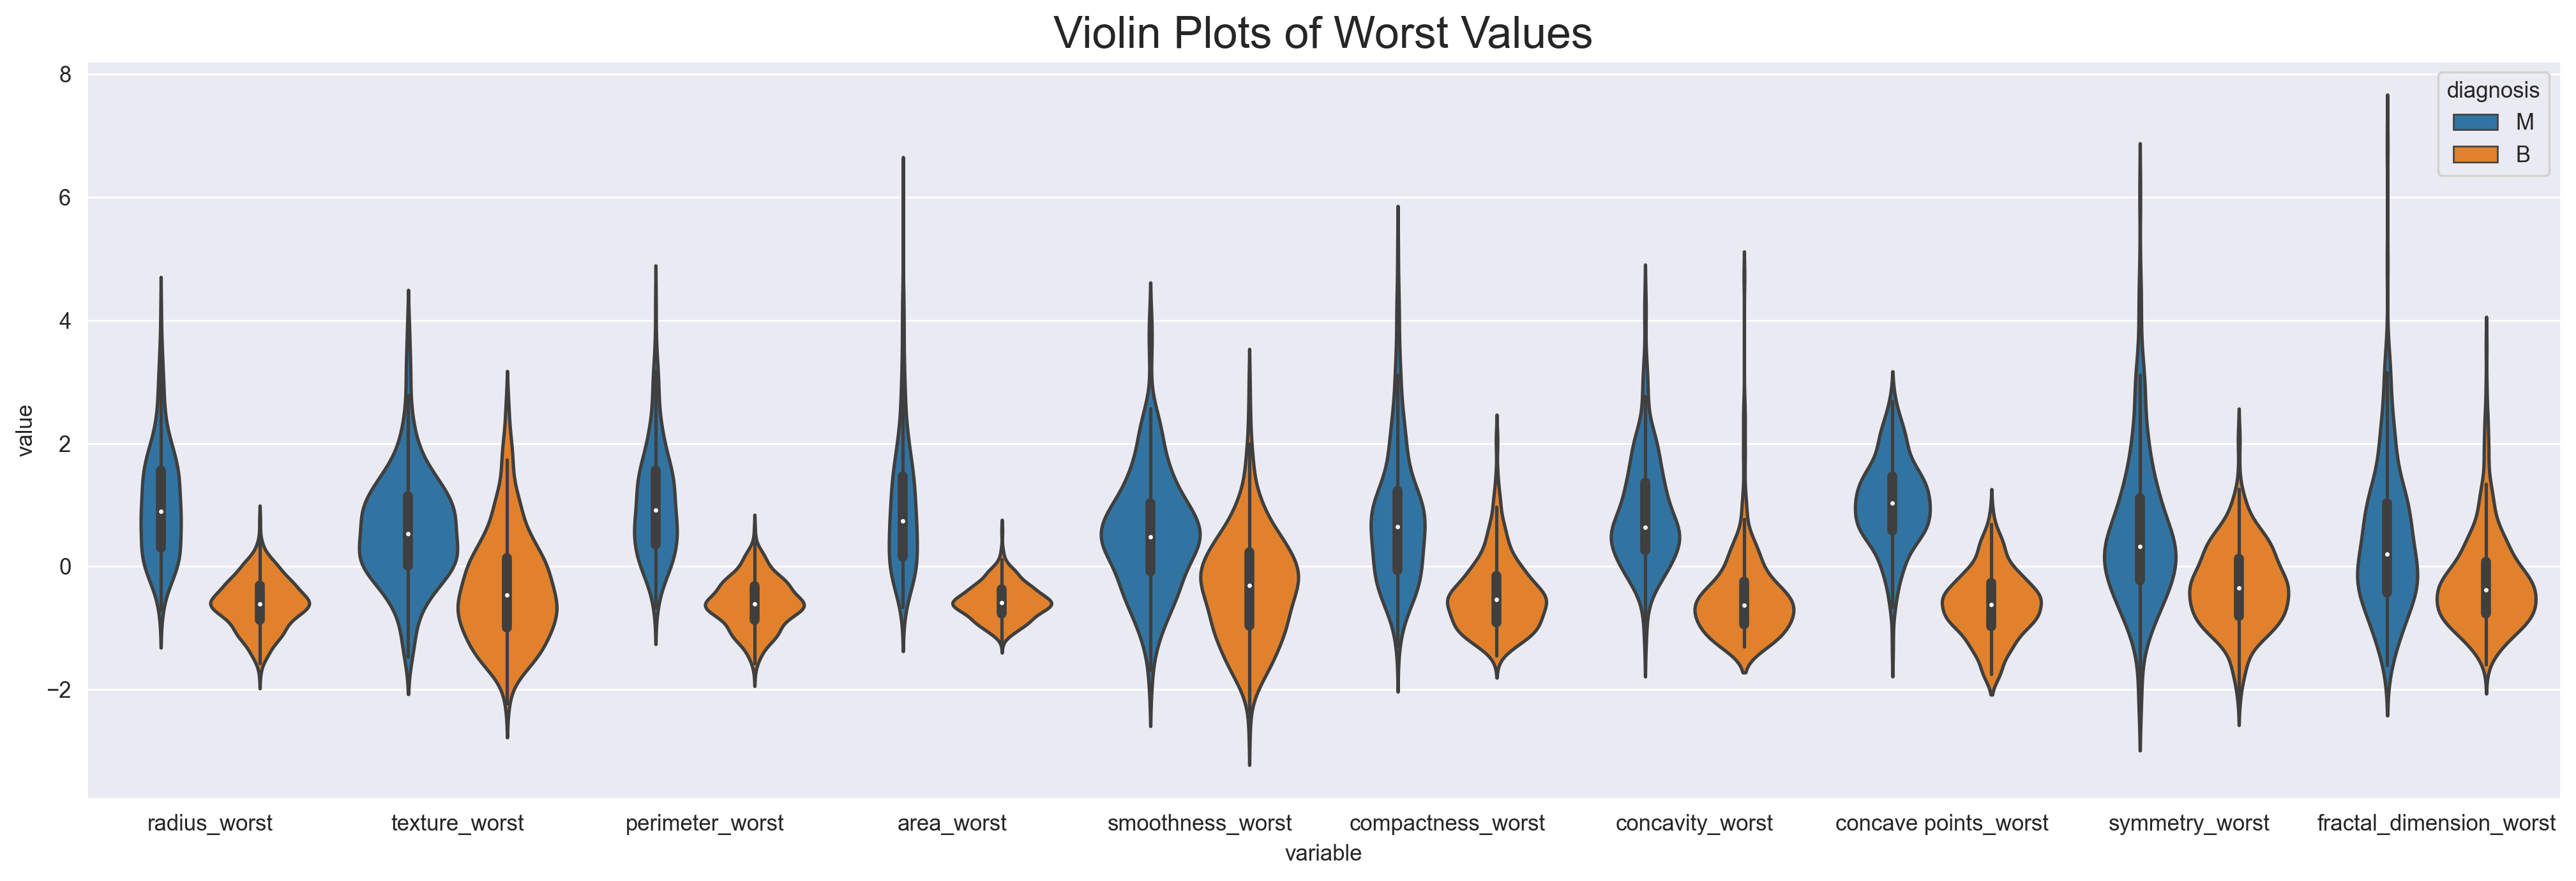

In [101]:
plt.figure(dpi=250, figsize=(20, 6))
fig_5 = sns.violinplot(data=standardized_data.iloc[:, 20:].assign(
    diagnosis=df_cleaned['diagnosis']).melt(id_vars='diagnosis'),
                       x='variable',
                       y='value',
                       hue='diagnosis')
plt.title('Violin Plots of Worst Values', size=20)

**As indicated previously, the values of 'perimeter' and 'area' vary greatly. However, it is important to note that this is only true for malignant diagnoses. Most benign cases are centred around a particular value.**

**The above theory seems to hold regardless of the feature in question; for all features, the malignant diagnoses seem to take on a larger range of values compared to the benign diagnoses.**

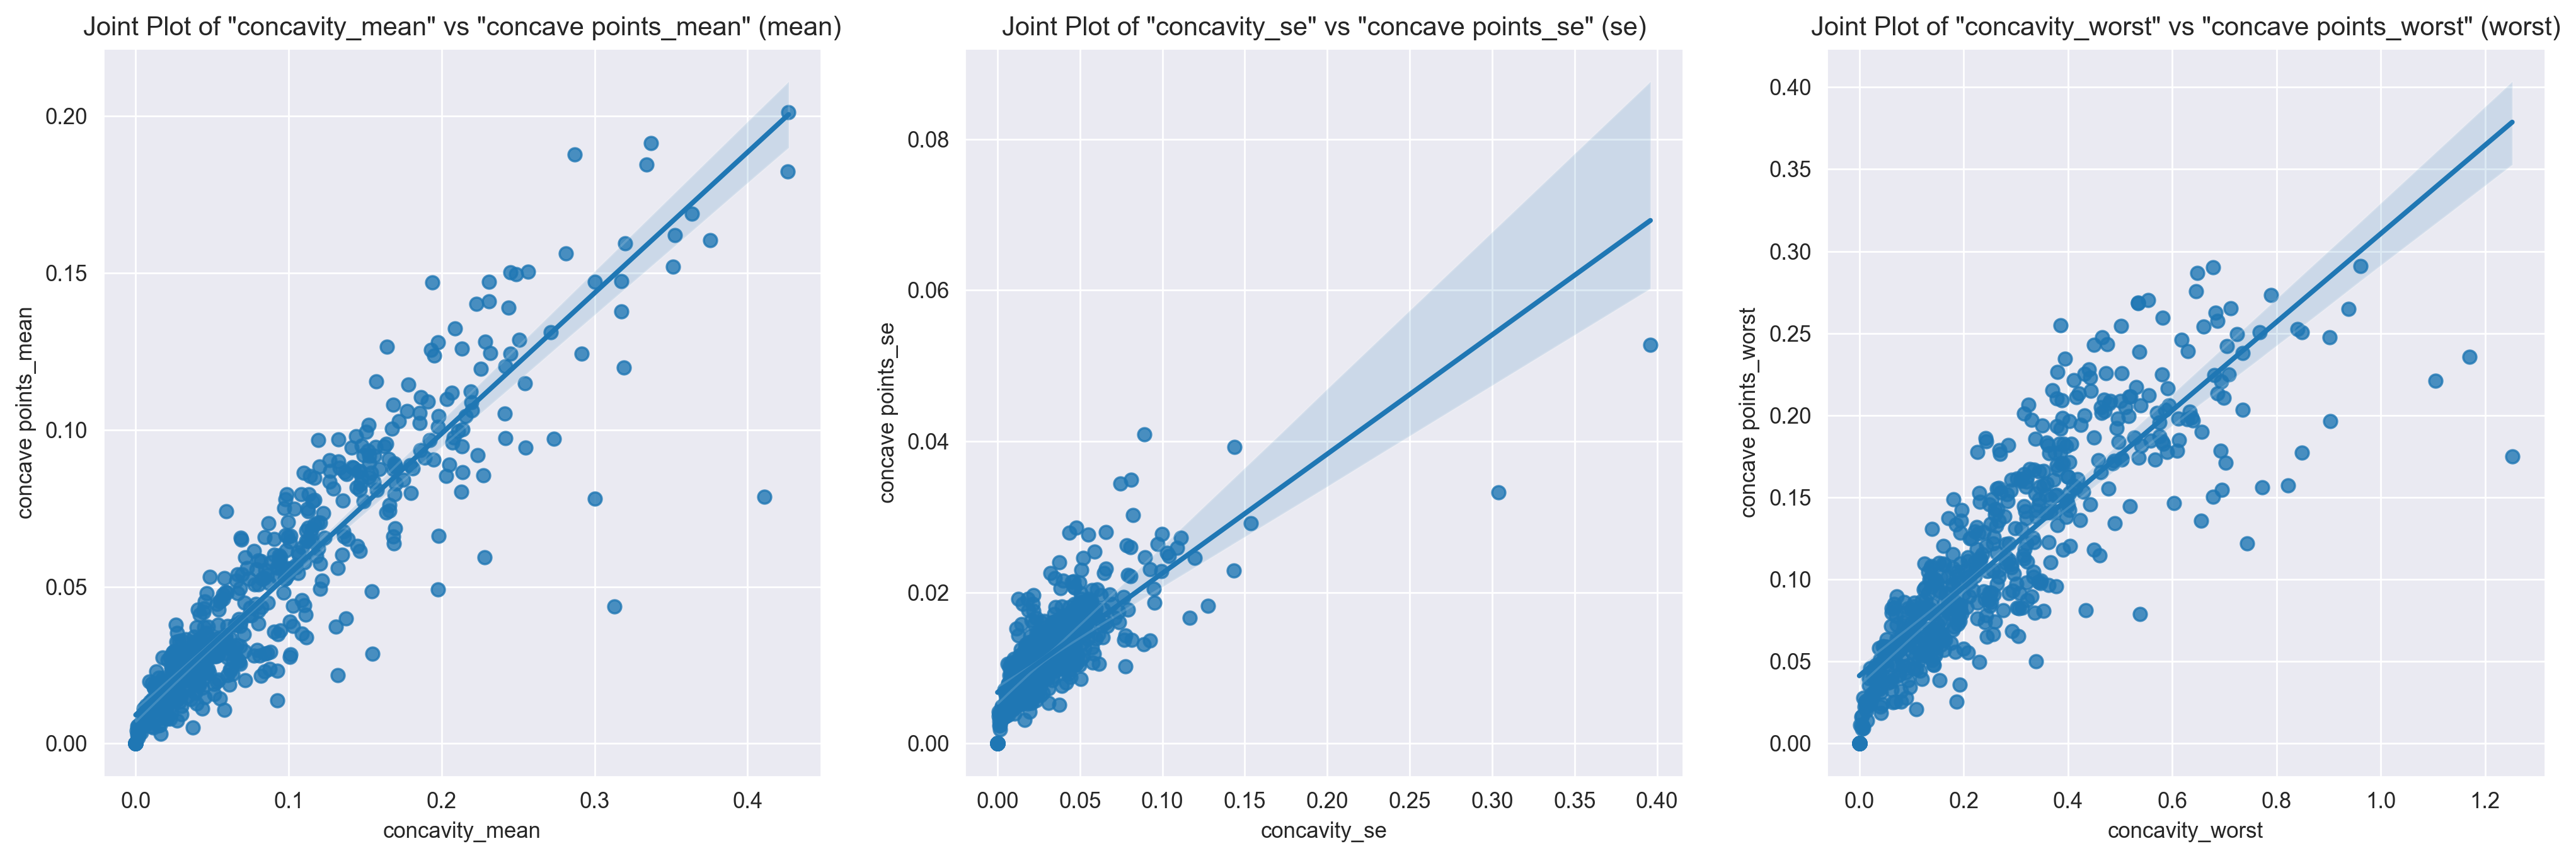

In [105]:
column_pairs = [('concavity_mean', 'concave points_mean', 'mean'),
                ('concavity_se', 'concave points_se', 'se'),
                ('concavity_worst', 'concave points_worst', 'worst')]

plt.figure(figsize=(20, 6), dpi=250)

for i, (x_col, y_col, title_suffix) in enumerate(column_pairs):
    plt.subplot(1, 3, i + 1)
    fig = sns.regplot(x=x_col, y=y_col, data=standardized_data)
    fig.set_title(
        f'Regression Plot of "{x_col}" vs "{y_col}" ({title_suffix})')

**Observations:**

1. **Compared to the 'mean' and 'worst' values, the 'se' values seem centred around the same value, except for a couple of outliers.**
2. **'concave points' and 'concavity' seem highly correlated, regardless of the statistic used. The heatmap previously made confirms this relationship.**